# Analyse de données de jeux vidéo

https://www.kaggle.com/gregorut/videogamesales

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dsVideoGames = pd.read_csv('vgsales.csv');
dsVideoGames.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Rank - Classement des ventes globales
- Name - Le nom du jeu
- Plate-forme - Plate-forme 
- Year - Année de sortie du jeu
- Genre - Genre du jeu
- Editeur - Editeur du jeu
- NA_Sales - Ventes en Amérique du Nord (en millions)
- EU_Sales - Ventes en Europe (en millions)
- JP_Sales - Ventes au Japon (en millions)
- Other_Sales - Ventes dans le reste du monde (en millions)
- Global_Sales - Ventes mondiales totales.

In [3]:
dsVideoGames = dsVideoGames[dsVideoGames['Year'].notna()]
dsVideoGames = dsVideoGames[dsVideoGames['Publisher'].notna()]
dsVideoGames.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [4]:
dsVideoGames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Les ventes globales en fonction de l'année

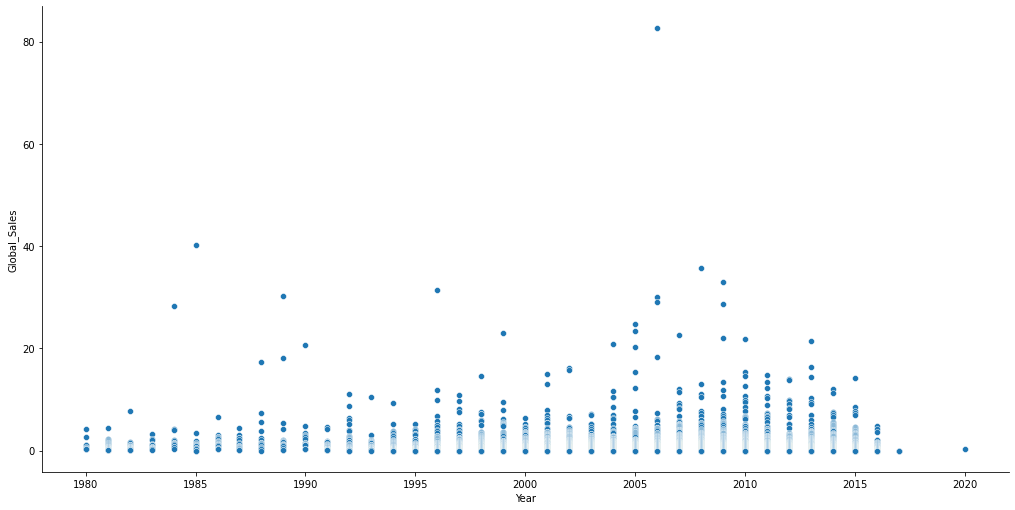

In [5]:
sns.relplot(x="Year", y="Global_Sales", data = dsVideoGames, height=7,aspect=2);

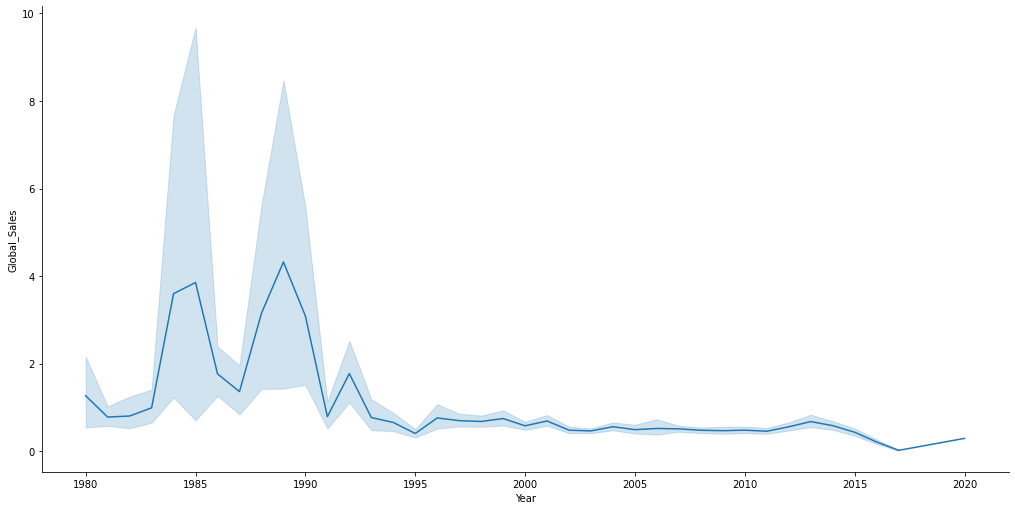

In [6]:
sns.relplot(x="Year", y="Global_Sales", data = dsVideoGames, height=7,aspect=2, kind="line");

On peut remarquer par ces graphiques qu'il y'a eu plus de vente en 1985 et 1989 environ au total.

## Les consoles utilisé dans le dataset 

In [7]:
dsVideoGames['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Les ventes en fonction de la console

In [8]:
dsVgByPlatform = dsVideoGames[['Platform', 'NA_Sales' ,'EU_Sales' , 'JP_Sales' , 'Other_Sales', 'Global_Sales']]
dsVgByPlatform = dsVgByPlatform.groupby(['Platform']).sum()
dsVgByPlatform

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,80.78,4.86,0.00,0.84,86.57
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.03,58.29,97.30,12.55,246.27
DC,5.43,1.69,8.56,0.27,15.97
DS,388.53,194.05,175.02,60.29,818.91
GB,113.64,47.51,85.12,8.16,254.42
GBA,178.43,72.49,46.56,7.51,305.62
GC,131.94,38.32,21.34,5.13,197.14
GEN,19.27,5.52,2.67,0.89,28.36


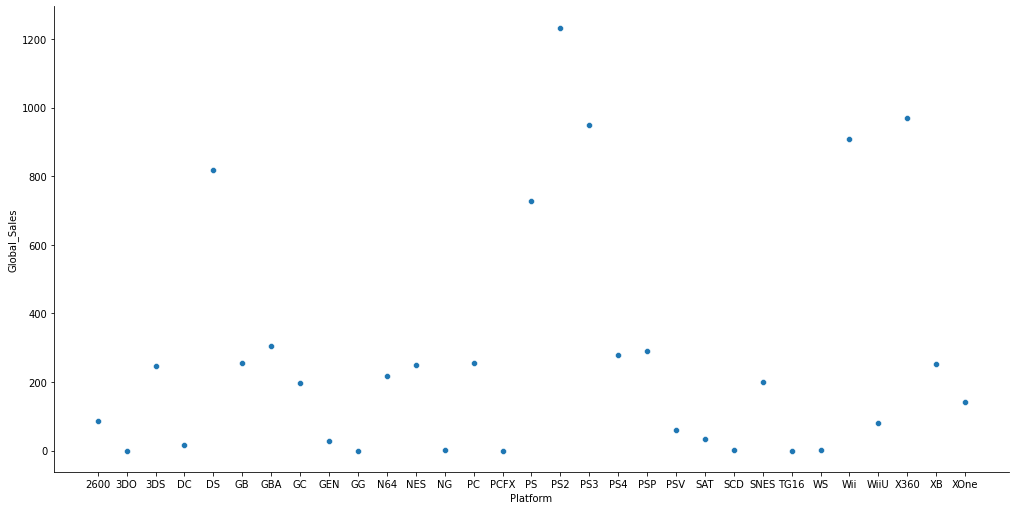

In [9]:
#Graphique des ventes en fonction de la console
sns.relplot(x="Platform", y="Global_Sales", data = dsVgByPlatform, height=7,aspect=2);

In [10]:
#On récupère seulement les ventes globales de toute les consoles
dsSales = dsVideoGames[['Platform','Global_Sales']].copy()
dsSales = dsSales.groupby(['Platform']).sum()
dsSales

,Global_Sales
Platform,
2600,86.57
3DO,0.10
3DS,246.27
DC,15.97
DS,818.91
GB,254.42
GBA,305.62
GC,197.14
GEN,28.36


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'XB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

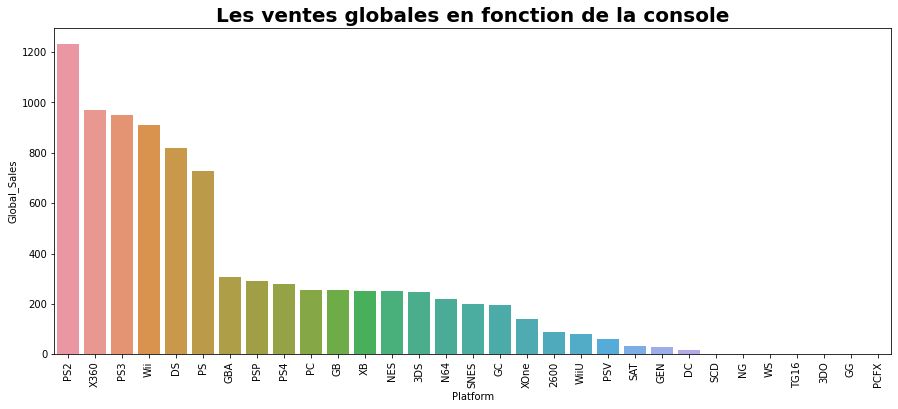

In [30]:
# version améliorée en utilisant barplot & reset_index
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Les ventes globales en fonction de la console', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
dfSalesPlatform = dsVideoGames.groupby(by=['Platform'])['Global_Sales'].sum()
dfSalesPlatform = dfSalesPlatform.reset_index()
dfSalesPlatform = dfSalesPlatform.sort_values(by=['Global_Sales'], ascending=False)
sns.barplot(x="Platform", y="Global_Sales", data=dfSalesPlatform)
plt.xticks(rotation=90)

On constate qu'il y'a eu en tout plus de vente sur la console PS2 qui ont vendu plus 1,2 Milliard en globalité.

## Les différents types de jeu

In [12]:
dsVideoGames['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

## le type de jeu le plus vendu?

In [13]:
dsGenreSales = dsVideoGames[['Genre','Global_Sales']].copy()
dsGenreSales = dsGenreSales.groupby(['Genre']).sum()
dsGenreSales = dsGenreSales.reset_index()
dsGenreSales = dsGenreSales.sort_values(by=['Global_Sales'], ascending=False)
dsGenreSales

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


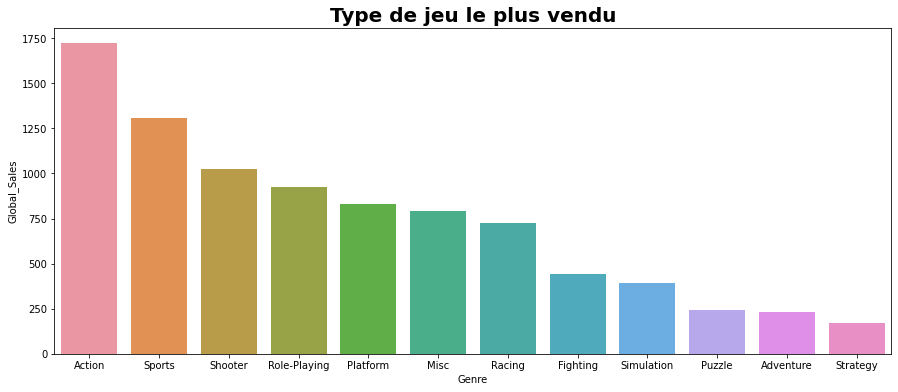

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Type de jeu le plus vendu', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
sns.barplot(x="Genre", y="Global_Sales", data = dsGenreSales);

<AxesSubplot:title={'center':'Nombre de jeu sortie par type'}, xlabel='Genre', ylabel='count'>

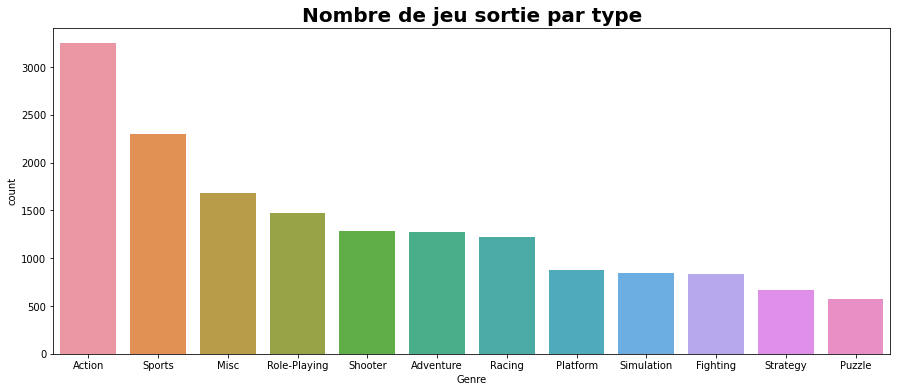

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_title('Nombre de jeu sortie par type', fontsize = 20, loc='center', fontdict=dict(weight='bold'))

sns.countplot(x = 'Genre', data = dsVideoGames , order = dsVideoGames['Genre'].value_counts().index)


On constate qu'il y'a plus de vente sur les jeux d'actions sport et jeu de tir cela suit plus ou moins le graphique sur les sorties des jeux. On remarque bien qu'il y'a plus de jeu d'action et sport.

<AxesSubplot:ylabel='Genre'>

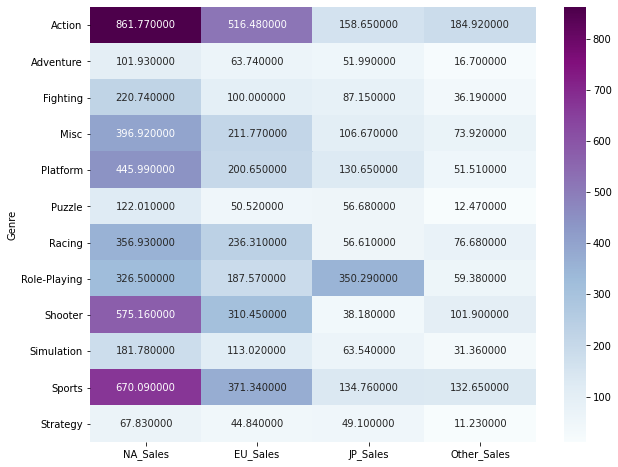

In [16]:
dsAreaSales = dsVideoGames[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
dsSumAreaGenre = dsAreaSales.groupby(by=['Genre']).sum()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dsSumAreaGenre, cmap="BuPu",annot=True, fmt="f")


En général il y'a plus de vente aux État unis que le reste. les jeux de type action, shooter et sport selon le plus vendu en Europe et Etat Unis.
Cependant, si nous étions un éditeur de jeu vidéo type rôle play alors il ne faudra pas négliger les japon car ce sont les jeux auxquels ils jouent plus.

## Les jeux les plus populaire sur PS2

<AxesSubplot:title={'center':'Nombre de jeu sortie par type sur PS2'}, xlabel='Genre', ylabel='count'>

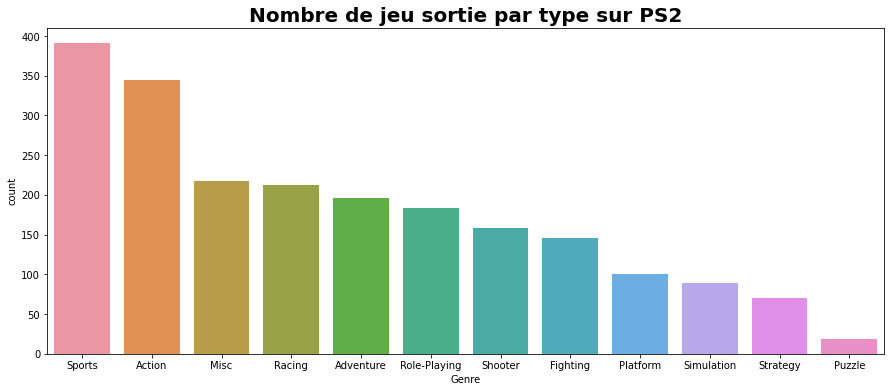

In [18]:
dsPS2= dsVideoGames[dsVideoGames['Platform'] == 'PS2']
dsPS2

fig, ax = plt.subplots(figsize=(15, 6))

ax.set_title('Nombre de jeu sortie par type sur PS2', fontsize = 20, loc='center', fontdict=dict(weight='bold'))

sns.countplot(x = 'Genre', data = dsPS2 , order = dsPS2['Genre'].value_counts().index)


Ce graphique nous montre qu'en fonction de la console on peut avoir une préférence de jeux. Par exemple sur la PS2 les joueurs auront tendence à préféré les jeux de sport et action.

## Les jeux le plus vendu

In [19]:
dsRank = dsVideoGames.sort_values(by=['Rank'])
dsRank.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


On remarque que le dataset possède un rang qui classe les jeux le plus vendu au moins vendu.

## L'année avec le plus de jeux sortie

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1981'),
  Text(25, 0, '1992'),
  Text(26, 0, '1991'),
  Text(27, 0, '1982'),
  Text(28, 0, '1986'),
  Text(29, 0, '1989'),
  Text(30, 0, '1983'),
  Text(31, 0, '1990'),
  Text(32, 0, '1987'),
  Text(33, 0, '1988'),
  Text(34, 0, '1985'),
  Text(35, 0, '1984'),


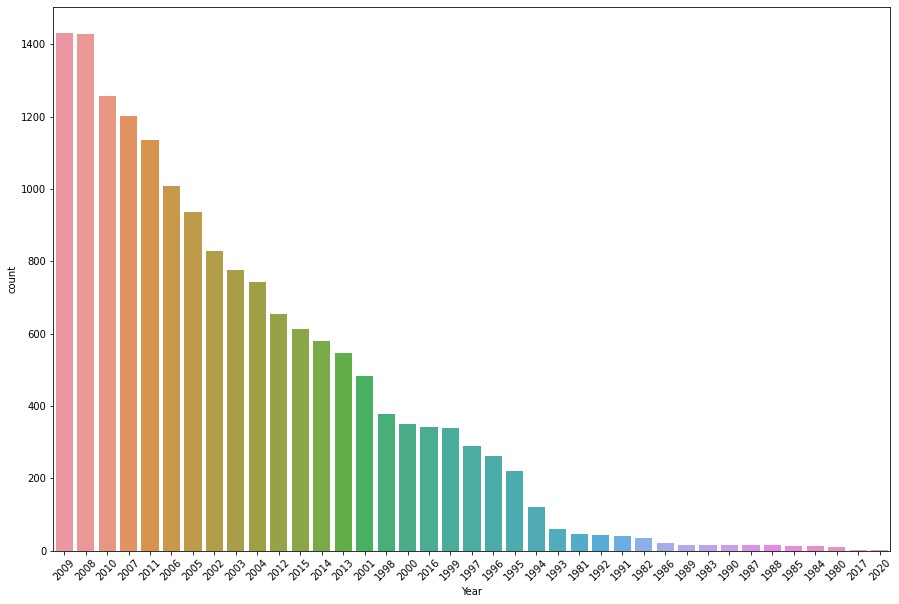

In [59]:
plt.figure(figsize=(15, 10))
dsVideoGames['Year'] = pd.to_numeric(dsVideoGames['Year'], downcast='signed')
sns.countplot(x="Year", data=dsVideoGames, order = dsVideoGames.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=45)

Ce graphique nous montre le nombre de jeux sortie durant les diverses années. On remarque donc qu'en 2009 et 2008 il y'a eu beaucoup de jeux sortie.

### Corrélation

In [21]:
dsVideoGames.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


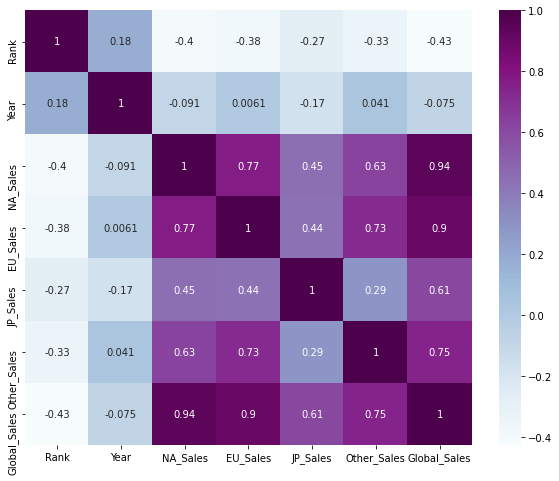

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dsVideoGames.corr(),cmap="BuPu",annot=True);